### 1. Summary of the Dataset

In [10]:
import pandas as pd
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_10sec.csv')

print(df.describe())

        Attention      NumFix   AvgFixDur    NumBlink  AvgBlinkDur  \
count  576.000000  576.000000  576.000000  576.000000   576.000000   
mean     0.545139   18.619792   25.763324    4.232639    14.125438   
std      0.498391    5.470829   11.418436    3.109264    22.378873   
min      0.000000    3.000000    8.777778    0.000000     0.000000   
25%      0.000000   15.000000   19.125385    2.000000     7.000000   
50%      1.000000   19.000000   23.683333    4.000000     9.763889   
75%      1.000000   22.000000   29.859375    6.000000    15.175000   
max      1.000000   37.000000   98.166667   15.000000   443.000000   

        AvgPupDia   VarPupDia  OffStimFram  
count  576.000000  576.000000   576.000000  
mean     3.612928    0.110282     6.324653  
std      0.618379    0.085685    12.334631  
min      2.137968    0.012454     0.000000  
25%      3.169069    0.054720     0.000000  
50%      3.564365    0.085608     2.000000  
75%      4.059892    0.140564     7.000000  
max      

### 2. Identify the best window size using the random forest model

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load CSV files into DataFrames
window_sizes = [5, 10, 15, 20, 25]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Loop through each DataFrame
results = []
for w, df in zip(window_sizes, dataframes):
    # Extract features and labels
    X = df[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram']]
    y = df['Attention']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    
    # Initialize and train classifier
    clf = RandomForestClassifier(random_state=None)
    clf.fit(X_train, y_train)
    
    # Evaluate using cross-validation
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Make predictions and evaluate performance
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results.append({'window': w, 'cv_mean_score': scores.mean(), 'classification_report': report})

for result in results:
    print(result)
# Compare results to find the best window size
best_result = max(results, key=lambda x: x['cv_mean_score'])
print(f"Best window size: {best_result['window']} with mean CV score: {best_result['cv_mean_score']:.2f}")
print(best_result['classification_report'])


{'window': 5, 'cv_mean_score': 0.5000899550224888, 'classification_report': {'0': {'precision': 0.46, 'recall': 0.46938775510204084, 'f1-score': 0.46464646464646464, 'support': 49.0}, '1': {'precision': 0.6060606060606061, 'recall': 0.5970149253731343, 'f1-score': 0.6015037593984962, 'support': 67.0}, 'accuracy': 0.5431034482758621, 'macro avg': {'precision': 0.5330303030303031, 'recall': 0.5332013402375876, 'f1-score': 0.5330751120224804, 'support': 116.0}, 'weighted avg': {'precision': 0.5443625914315571, 'recall': 0.5431034482758621, 'f1-score': 0.5436933504084139, 'support': 116.0}}}
{'window': 10, 'cv_mean_score': 0.5054122938530734, 'classification_report': {'0': {'precision': 0.5813953488372093, 'recall': 0.5, 'f1-score': 0.5376344086021505, 'support': 50.0}, '1': {'precision': 0.6575342465753424, 'recall': 0.7272727272727273, 'f1-score': 0.6906474820143885, 'support': 66.0}, 'accuracy': 0.6293103448275862, 'macro avg': {'precision': 0.6194647977062759, 'recall': 0.6136363636363

#### 2.1 Use the Logit Regression model to statistically identify how many features are relevant to the mind wandering

In [34]:
# By default, Jupyter Notebooks and JupyterLab will use your current working directory as the root directory.
# Cur dir: /Analysis/Summary/FreeViewing/Code
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_25sec.csv')
df['Attention'] = df['Attention'].astype(int)

# Define the predictor variables (X) and the target variable (y)
X = df[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram']]
y = df['Attention']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit a logistic regression model
logit_model = sm.Logit(y, X).fit()

# Summarize the results
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.644299
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attention   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 May 2024   Pseudo R-squ.:                 0.06497
Time:                        15:56:36   Log-Likelihood:                -371.12
converged:                       True   LL-Null:                       -396.90
Covariance Type:            nonrobust   LLR p-value:                 7.090e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1874      1.405     -0.845      0.398      -3.940       1.566
NumFix          0.0350    

**Summary**
- The best window size (25) yielded a mean CV score of 0.57.
- Significant predictors of mind wandering are NumFix, NumBlink, and VarPupDia.
- The logistic regression model's Pseudo R-squ. value (0.06497) is relatively low, suggesting that while these predictors provide some explanation, additional or more accurate features may further improve the model.

**Next Steps**
- Investigate additional predictors or other window sizes.
- Consider cross-validation or other statistical tests to ensure robustness.
- Explore alternative models to compare predictive performance.

#### 2.2 Correlation Heatmap of extracted features

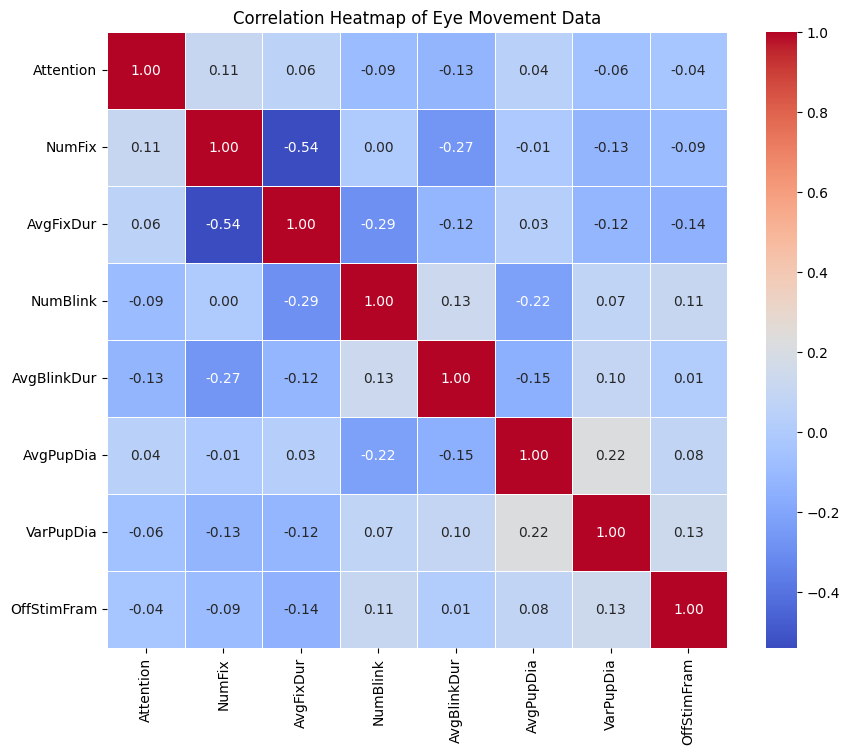

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_5sec.csv')
X = df[['Attention', 'NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram']]
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Eye Movement Data")
plt.show()

#### 2.3 ANOVA
- If you're interested in differences between groups (e.g., different stimuli), ANOVA can help determine if there are statistically significant differences in eye movement parameters across different levels of attention.

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your data
data = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_5sec.csv')  # Update the path to your CSV file

# List of variables to analyze
variables = ['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram']

# Dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each variable across different stimuli
for var in variables:
    model = ols(f'{var} ~ C(Stimuli)', data=data).fit()
    anova_results[var] = sm.stats.anova_lm(model, typ=2)  # Using Type II sum of squares

# Print the ANOVA results for each variable
for var, result in anova_results.items():
    print(f"ANOVA Results for {var}:")
    print(result)
    print("\n")


ANOVA Results for NumFix:
                 sum_sq     df         F    PR(>F)
C(Stimuli)   213.409722   23.0  0.802219  0.730262
Residual    6384.583333  552.0       NaN       NaN


ANOVA Results for AvgFixDur:
                   sum_sq     df         F    PR(>F)
C(Stimuli)    6654.318383   23.0  0.687748  0.859909
Residual    232212.340775  552.0       NaN       NaN


ANOVA Results for NumBlink:
                 sum_sq     df         F   PR(>F)
C(Stimuli)    47.234375   23.0  0.602311  0.92855
Residual    1882.125000  552.0       NaN      NaN


ANOVA Results for AvgBlinkDur:
                   sum_sq     df         F    PR(>F)
C(Stimuli)    7601.350770   23.0  0.876869  0.630875
Residual    208049.734896  552.0       NaN       NaN


ANOVA Results for AvgPupDia:
                sum_sq     df         F    PR(>F)
C(Stimuli)    4.224863   23.0  0.412879  0.993522
Residual    245.584875  552.0       NaN       NaN


ANOVA Results for VarPupDia:
              sum_sq     df         F    PR(>F)

- Interpretation of ANOVA Results:
    - p-values: All p-values are well above the typical significance level (usually 0.05). This implies that the null hypothesis (no difference in eye movement parameters across different stimuli) cannot be rejected for any of the parameters you analyzed.
    - F-statistic: The F-values are relatively low, which supports the lack of statistically significant differences across groups.

5 [0.5775862068965517, 0.5344827586206896, 0.5603448275862069, 0.5948275862068966, 0.5, 0.5086206896551724, 0.5689655172413793, 0.5948275862068966, 0.5086206896551724, 0.5775862068965517, 0.5862068965517241, 0.5603448275862069, 0.5517241379310345, 0.5258620689655172, 0.5, 0.5172413793103449, 0.5689655172413793, 0.5344827586206896, 0.6379310344827587, 0.6379310344827587, 0.5258620689655172, 0.5431034482758621, 0.6293103448275862, 0.5344827586206896, 0.5948275862068966, 0.6206896551724138, 0.5258620689655172, 0.5431034482758621, 0.5948275862068966, 0.5172413793103449, 0.5775862068965517, 0.6379310344827587, 0.5689655172413793, 0.5172413793103449, 0.6293103448275862, 0.6206896551724138, 0.5603448275862069, 0.5431034482758621, 0.5862068965517241, 0.5258620689655172, 0.5775862068965517, 0.6120689655172413, 0.5603448275862069, 0.5862068965517241, 0.5, 0.5517241379310345, 0.5172413793103449, 0.5603448275862069, 0.5775862068965517, 0.5]
10 [0.5344827586206896, 0.5517241379310345, 0.61206896551

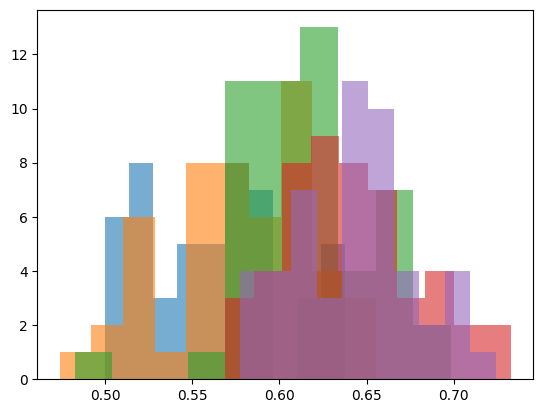

In [32]:
import pandas as pd
import statistics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load CSV files into DataFrames
window_sizes = [5, 10, 15, 20, 25]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Loop through each DataFrame
all_accuracies = {w: [] for w in window_sizes}

for state in range(50):  # Loop through 20 random states
    for w, df in zip(window_sizes, dataframes):
        # Extract features and labels
        X = df[['NumFix', 'AvgFixDur', 'NumBlink', 'AvgBlinkDur', 'AvgPupDia', 'VarPupDia', 'OffStimFram']]
        y = df['Attention']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Initialize and train classifier
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)

        # Evaluate accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy
        all_accuracies[w].append(accuracy)

# Calculate the average accuracy and variance for each window size
for w, acc in all_accuracies.items():
    print(w, acc)
    
average_accuracies = []
for w, accuracies in all_accuracies.items():
    avg_accuracy = sum(accuracies) / len(accuracies)
    stdev_accuracy = statistics.stdev(accuracies)
    average_accuracies.append({'window': w, 'average_accuracy': avg_accuracy, 'stdev_accuracy': stdev_accuracy})

# Print the average accuracy and variance for each window size
for result in average_accuracies:
    print(f"Window size: {result['window']}, Average Accuracy: {result['average_accuracy']:.4f}, Stdev: {result['stdev_accuracy']:.4f}")


for w, accuracies in all_accuracies.items():
    plt.hist(accuracies, bins=10, alpha=0.6, label=f'Window Size: {w}')